In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('data/data.csv')
df.head()
df.shape
df.columns, df.isna().sum().head(10)


(Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
       dtype='object'),
 id                     0
 diagnosis              0
 radius_mean            0
 texture_mean           0
 perimeter_mean         0
 area_mean              0
 smoothness_mean        0
 compactness_mean       0
 concavity_mean         0
 concave points_mean    0
 dtype: int64)

In [12]:
# drop useless columns
df = df.drop(columns=["id", "Unnamed: 32"])

# convert target to numeric (M=1, B=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# X = all the input columns (features)
X = df.drop(columns=["diagnosis"])

# y = the answer we want to predict
y = df["diagnosis"]

X.shape, y.shape


((569, 30), (569,))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# turn labels into numbers (M/B → 1/0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train.shape, X_test.shape


((455, 30), (114, 30))

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train a simple decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# predict on test set
dt_preds = dt.predict(X_test)

# evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("\nReport:\n", classification_report(y_test, dt_preds, target_names=[str(c) for c in le.classes_]))


Decision Tree Accuracy: 0.9298245614035088
Confusion Matrix:
 [[68  4]
 [ 4 38]]

Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



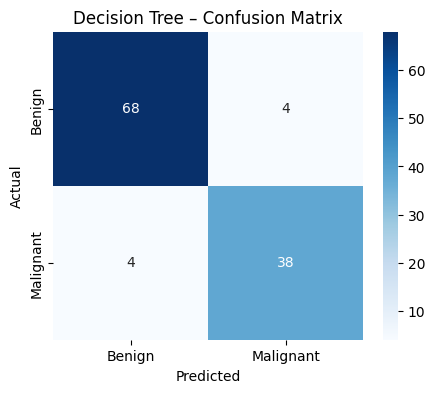

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree – Confusion Matrix")
plt.show()


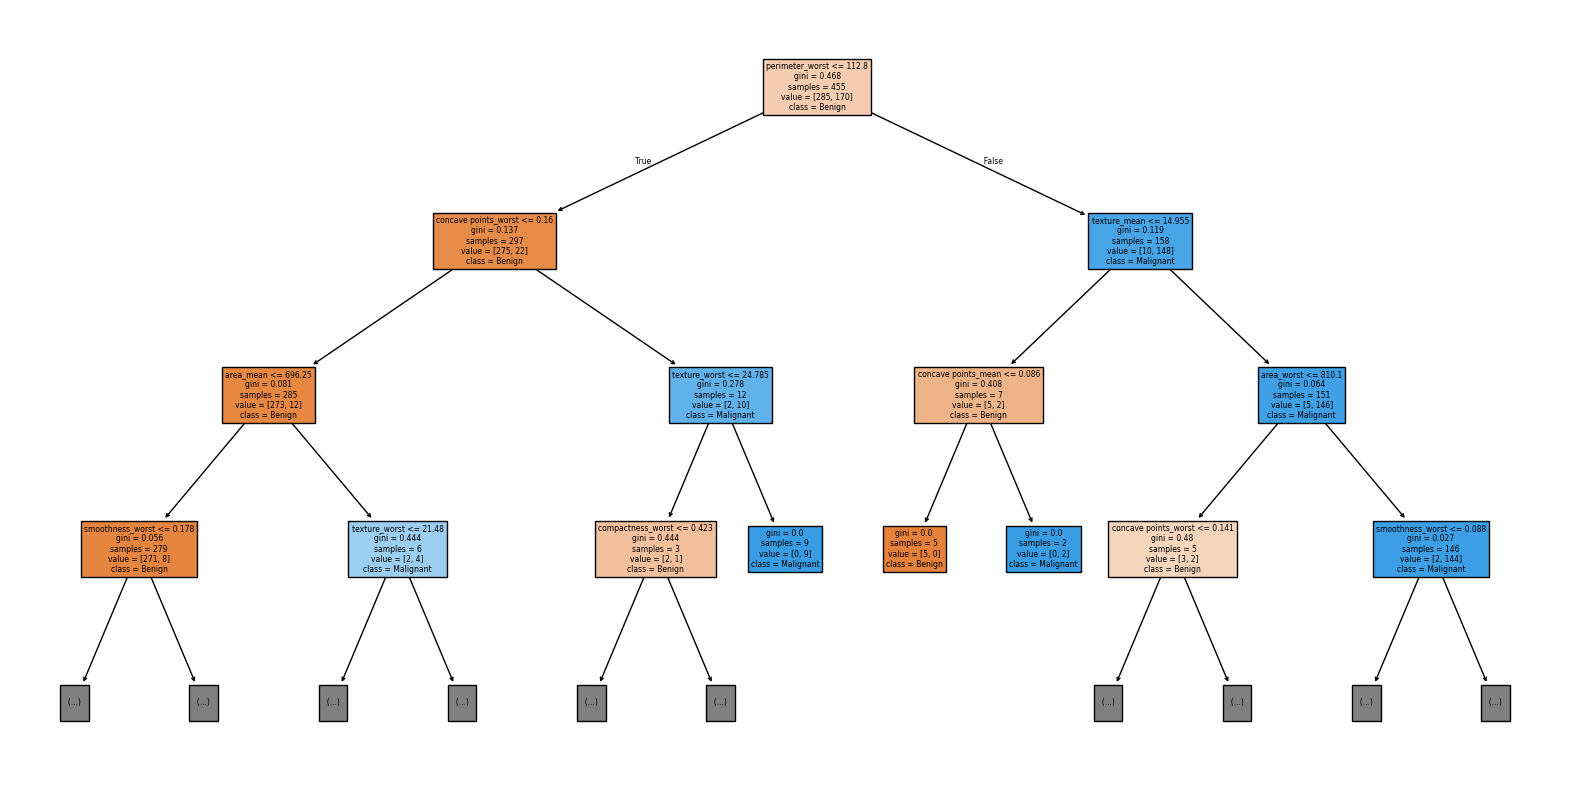

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Benign", "Malignant"],
    filled=True,
    max_depth=3
)
plt.show()


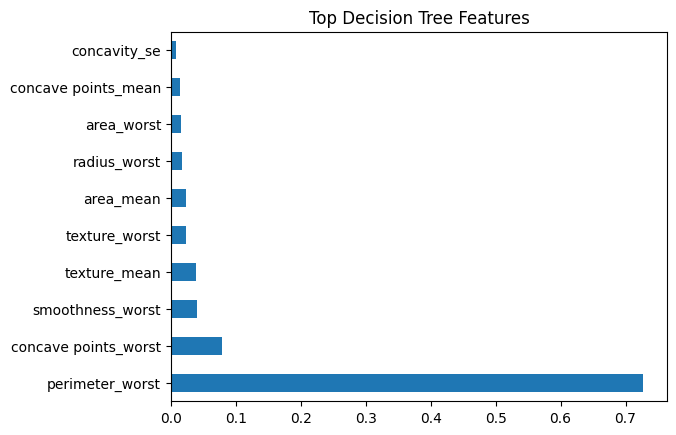

In [19]:
import pandas as pd

importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(
    kind="barh", title="Top Decision Tree Features"
)
plt.show()


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Scale features (VERY important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 3. Predict
knn_preds = knn.predict(X_test_scaled)

# 4. Evaluate
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))
print("\nReport:\n", classification_report(y_test, knn_preds))


KNN Accuracy: 0.956140350877193
Confusion Matrix:
 [[71  1]
 [ 4 38]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



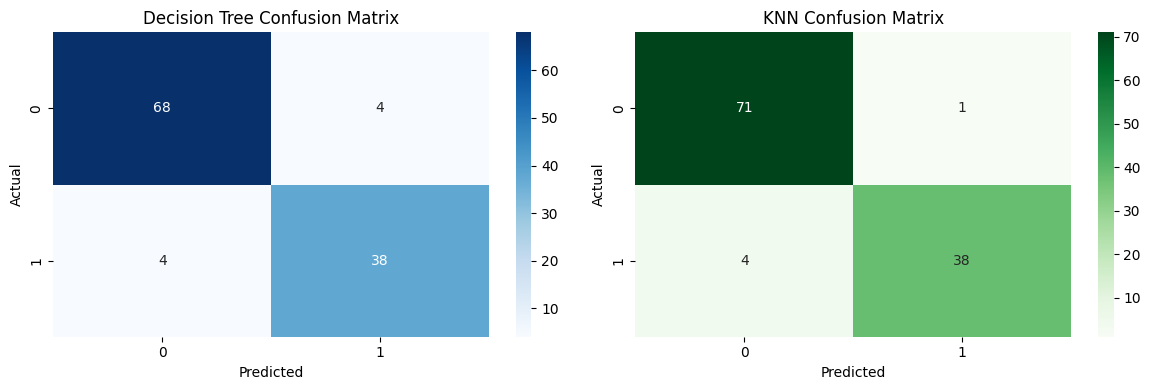

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_dt = confusion_matrix(y_test, dt_preds)
cm_knn = confusion_matrix(y_test, knn_preds)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# KNN
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


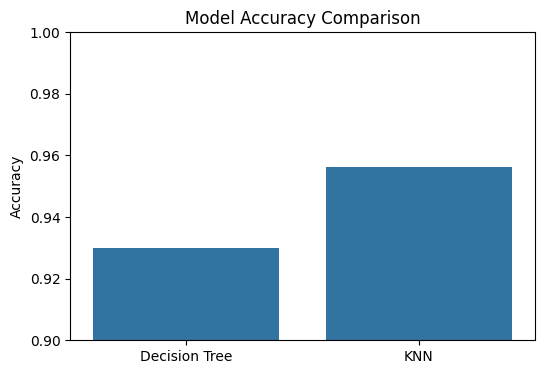

In [22]:
models = ["Decision Tree", "KNN"]
accuracies = [
    accuracy_score(y_test, dt_preds),
    accuracy_score(y_test, knn_preds)
]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies)
plt.ylim(0.9, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
